In [229]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [230]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
#!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [231]:
df = pd.read_csv('portuguese_bbc_text_cls.csv')

In [232]:
df.head()

,text,labels
0,Vendas de anúncios aumentam lucro da Time Warn...,negócio
1,Dólar ganha com discurso de Greenspan\n\nO dól...,negócio
2,Comprador de unidade da Yukos enfrenta pedido ...,negócio
3,Preços elevados dos combustíveis atingem os lu...,negócio
4,Negociação de aquisição da Pernod eleva Domecq...,negócio


In [233]:
len(df)

2225

In [234]:
inputs = df['text']
labels = df['labels']
labels.unique()

array(['negócio', 'entretenimento', 'política', 'esporte', 'tecnologia'],
      dtype=object)

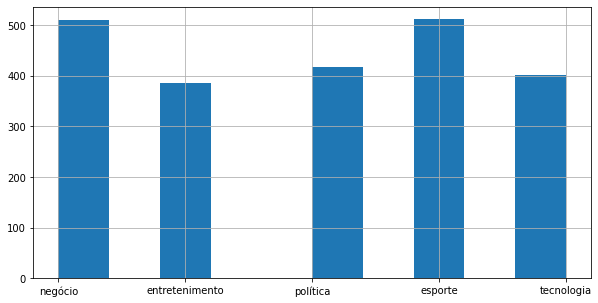

In [235]:
labels.hist(figsize=(10, 5));

In [236]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels)
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [237]:
Xtrain

<1668x33388 sparse matrix of type '<class 'numpy.int64'>'
	with 344852 stored elements in Compressed Sparse Row format>

In [238]:
(Xtrain != 0).sum() 

344852

In [239]:
# what percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.006192218861786095

In [240]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9958033573141487
test score: 0.9730700179533214


In [241]:
noticia = ["A economia da China cresceu apenas 4% no último trimestre de 2021, seu ritmo mais lento em um ano e meio, momento em que enquanto o país enfrentava uma crise imobiliária cada vez mais profunda, novos surtos de Covid-19 e a estrita abordagem de não-tolerância de Pequim para controlar o vírus. Ainda assim, esse número foi maior do que o esperado pelos economistas. Para todo o ano de 2021, o PIB cresceu 8,1%, praticamente em linha com as expectativas dos analistas. O governo chinês estabeleceu uma meta na primavera passada para que sua economia expandisse pelo menos 6% no ano."]

noticia = vectorizer.transform(noticia)
resultado = model.predict(noticia)
print("resultado: ", resultado)


resultado:  ['negócio']


In [242]:
noticia = ["O problema sanguíneo que dificulta ida de humanos a Marte Cientistas fizeram novas descobertas a respeito de por que as viagens espaciais fazem com que astronautas fiquem anêmicos, às vezes por longos períodos, ao retornarem à Terra. Pesquisadores canadenses afirmam que 50 % a mais de glóbulos vermelhos são destruídas no espaço, e isso continua a acontecer ao longo de toda a duração da missão. Como resultado, viagens longas à Lua, à Marte e além - incluindo viagens de turismo espacial - podem ser um desafio. Ao mesmo tempo, as descobertas podem ajudar pacientes hospitalizados em UTIs na Terra que também sofrem de anemia. Cientistas fizeram novas descobertas a respeito de por que as viagens espaciais fazem com que astronautas fiquem anêmicos, às vezes por longos períodos, ao retornarem à Terra. Pesquisadores canadenses afirmam que 50 % a mais de glóbulos vermelhos são destruídas no espaço, e isso continua a acontecer ao longo de toda a duração da missão. Como resultado, viagens longas à Lua, à Marte e além - incluindo viagens de turismo espacial - podem ser um desafio. Ao mesmo tempo, as descobertas podem ajudar pacientes hospitalizados em UTIs na Terra que também sofrem de anemia."]

noticia = vectorizer.transform(noticia)
resultado = model.predict(noticia)
print("resultado: ", resultado)


resultado:  ['tecnologia']


In [243]:
noticia = ["Real Madrid: Marcelo tem chance de superar Ramos e ficar a um passo de 'recorde inatingível' de lenda Real Madrid encara Athletic Bilbao neste domingo, na Arábia Saudita, e busca o 12º título da Supercopa da Espanha. Maior campeão é o Barcelona, com 13, enquanto time basco soma três Marcelo já é um dos maiores da história rica, gloriosa e mais que centenária do Real Madrid. Apesar de ter perdido espaço no time titular nos últimos anos, o brasileiro tem a chance de alcançar um feito impressionante neste domingo(16), na Arábia Saudita. Se o Real vencer o Athletic Bilbao e conquistar a Supercopa da Espanha, em partida com transmissão ao vivo pela ESPN no Star+, às 15h30(de Brasília), Marcelo se tornará, isoladamente, o segundo jogador com mais títulos pelo clube merengue. Star+, novo streaming da Disney Agora você pode assistir a todos os conteúdos da ESPN ao vivo quando e onde quiser no Star+. Um novo jeito de ver esportes. Assine já. O brasileiro soma 22 troféus desde que chegou ao Santiago Bernabéu, em 2006, e divide o posto com Sergio Ramos, zagueiro espanhol que hoje atua no Paris Saint-Germain, após deixar o Real Madrid há pouco mais de um semestre. Juntos, os dois ganharam os seguintes títulos: Quem lidera o ranking de campeões do clube é Francisco Gento, ponta esquerda espanhol que, para muitos, integra a seleção de todos os tempos do Real Madrid – o que só mostra o quanto ele jogava. 'Paco' Gento defendeu a camisa branca por 18 temporadas consecutivas, entre 1952 e 1971, e anotou 182 gols em 600 jogos oficiais. São, ao todo, 24 títulos no clube, entre eles seis edições da antiga Copa do Campeões, que se tornou a Champions. O rol de conquistas tem também uma 'Pequena Copa do Mundo', torneio disputado na Venezuela que Corinthians(1953) e São Paulo(1955 e 1963) ganharam, e duas vezes a Copa Latina, competição que tinha apenas equipes de Espanha, Portugal, França e Itália."]

noticia = vectorizer.transform(noticia)
resultado = model.predict(noticia)
print("resultado: ", resultado)


resultado:  ['esporte']


In [244]:
noticia = ["Rui Falcão contesta chapa Lula-Alckmin e vê contradição com as ideias do PT De acordo com o ex-presidente do partido, a aliança coloca em risco o programa de mudanças na economia O deputado federal Rui Falcão (PT-SP), que é também ex-presidente do Partido dos Trabalhadores, contestou a chapa Lula-Alckmin, em entrevista ao jornalista Ranier Bragon, publicada na Folha de S. Paulo. Lula não precisa de uma muleta eleitoral, afirmou. Temos um programa de reconstrução e transformação do país, como a Fundação Perseu Abramo vem trabalhando. Segundo, o Alckmin é a contradição a tudo isso que fizemos e pretendemos fazer. Terceiro, dá uma sinalização muito negativa para uma campanha que tem que ser aguerrida, mobilizada e com a construção de comitês de defesa da eleição do Lula que permaneçam depois como comitês de apoio do programa de transformação. Além do retrospecto das políticas que realizou como governador de São Paulo, do apoio ao impeachment e de suas posições ultraconservadoras, afirma."]

noticia = vectorizer.transform(noticia)
resultado = model.predict(noticia)
print("resultado: ", resultado)


resultado:  ['política']


In [245]:
noticia = ["Pânico desbanca Homem-Aranha e estreia no topo da bilheteria Novo filme da franquia arrecadou US$ 30, 6 milhões nos EUA Com uma arrecadação de US$ 30,6 milhões em seu final de semana de estreia, o novo Pânico desbancou Homem-Aranha: Sem Volta Para Casa do topo da bilheteria e chegou ao primeiro lugar nos Estados Unidos. O terceiro filme da franquia estrelada por Tom Holland, que passou quatro semanas em #1, arrecadou US$ 20,8 milhões nos últimos três dias e atualmente registra um total de US$ 698,7 milhões nos EUA. Com isso, o musical animado Sing 2 desceu para o terceiro lugar, com US$ 8,2 milhões a mais, ainda ficando a frente de As Agentes 355, que arrecadou mais US$ 2,34 milhões. Fechando o Top 5 ficou The King's Man: A Origem, com mais US$ 2,31 milhões e um total de US$ 28,6 milhões."]

noticia = vectorizer.transform(noticia)
resultado = model.predict(noticia)
print("resultado: ", resultado)


resultado:  ['entretenimento']


In [246]:
def result_classification(file):
    with open(file) as f:
        noticia = f.read()

    noticia = vectorizer.transform([noticia])
    resultado = model.predict(noticia)
    print(f"{file}: ", resultado)

In [247]:
files = {
    'texto_entretenimento_original.txt': 'texto_entretenimento_sumarizado.txt',
    'texto_esporte_original.txt': 'texto_esporte_sumarizado.txt',
    'texto_negocio_original.txt': 'texto_negocio_sumarizado.txt',
    'texto_politica_original.txt': 'texto_politica_sumarizado.txt',
    'texto_tecnologia_original.txt': 'texto_tecnologia_sumarizado.txt'
}
print('='*50)
for file_key, file_value in files.items():
    result_classification(file_key)
    result_classification(file_value)
    print('='*50)

texto_entretenimento_original.txt:  ['entretenimento']
texto_entretenimento_sumarizado.txt:  ['entretenimento']
texto_esporte_original.txt:  ['esporte']
texto_esporte_sumarizado.txt:  ['esporte']
texto_negocio_original.txt:  ['negócio']
texto_negocio_sumarizado.txt:  ['negócio']
texto_politica_original.txt:  ['política']
texto_politica_sumarizado.txt:  ['negócio']
texto_tecnologia_original.txt:  ['tecnologia']
texto_tecnologia_sumarizado.txt:  ['tecnologia']
